## Introduction

We are examining the Ames, Iowa data set found on [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). The data set contains data on approximately 1,400 home sales between 2006 and 2010. 

Our goal is to predict the price of homes from an unknown test set. Moreover, we seek to examine some select features that impact the price of home sales. This information can be used by realtors, homeowners, or homebuyers to make more informed decisions when buying or selling a home.   

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# # adjust figure size & dpi as needed
# from pylab import rcParams
# rcParams['figure.figsize'] = 10,5
# rcParams['figure.dpi'] = 300

# # to display max columns or rows as needed 
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)

%matplotlib inline

In [3]:
train_o = pd.read_csv("../data/train.csv")
test_o = pd.read_csv("../data/test.csv")

# train_o = pd.read_csv('./house-prices-advanced-regression-techniques/train.csv')

# test_o = pd.read_csv('./house-prices-advanced-regression-techniques/test.csv')

In [4]:
train = train_o.copy()

test = test_o.copy()

Make the columns names lowercase:

In [5]:
train.columns = map(str.lower, train.columns)

In [7]:
print("The training dimensions: ", train.shape)
print("The test dimensions: ", test.shape) #price column missing and 1 record missing

The training dimensions:  (1460, 81)
The test dimensions:  (1459, 80)


Examination of the target variable indicates a more normal distribution after taking the log transformation.
- The transformation has a low skewness, however the kurtosis is also lower than the normal distribution (3).
    - This means that the distribution has shorter tails and a lower peak. However, the transformation is more normal.  

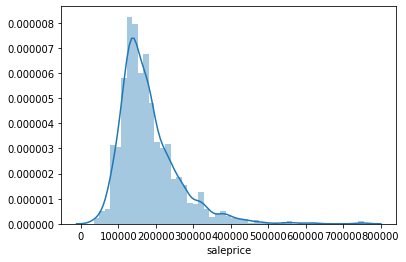

In [6]:
sns.distplot(train.saleprice)

In [7]:
print("Skewness before log transformation: ", train['saleprice'].skew())
print("Kurtosis before log transformation: ", train['saleprice'].kurt())
print("-" * 55)
print("Skewness after log transformation: ", np.log(train['saleprice']).skew())
print("Kurtosis after log transformation: ", np.log(train['saleprice']).kurt())

Skewness before log transformation:  1.8828757597682129
Kurtosis before log transformation:  6.536281860064529
-------------------------------------------------------
Skewness after log transformation:  0.12133506220520406
Kurtosis after log transformation:  0.8095319958036296


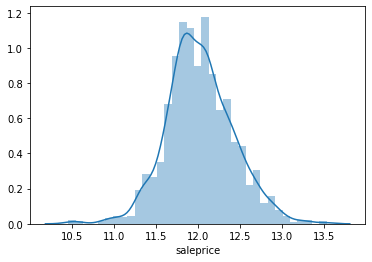

In [8]:
sns.distplot(np.log(train.saleprice))

Furthermore, we saw similar results from the Q-Q plot. Both graphs indicate that a log transformation of sale price helps to better satisfy the normality assumption required for linear regression. However, We will have to check the results on the error terms after our model is fit.

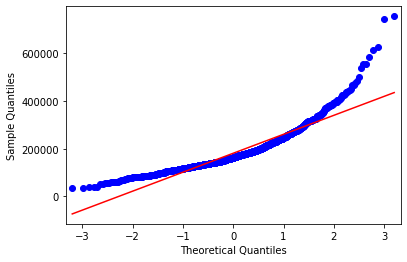

In [9]:
sm.qqplot(train.saleprice, line='s') 
plt.show()

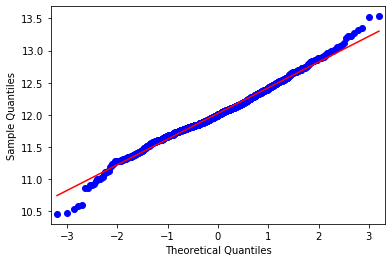

In [10]:
sm.qqplot(np.log(train.saleprice), line='s') 
plt.show()

In [6]:
y_target = train.saleprice

y_log = np.log(train.saleprice)

train['sale_log'] = y_log

In [12]:
train.dtypes

id                 int64
mssubclass         int64
mszoning          object
lotfrontage      float64
lotarea            int64
street            object
alley             object
lotshape          object
landcontour       object
utilities         object
lotconfig         object
landslope         object
neighborhood      object
condition1        object
condition2        object
bldgtype          object
housestyle        object
overallqual        int64
overallcond        int64
yearbuilt          int64
yearremodadd       int64
roofstyle         object
roofmatl          object
exterior1st       object
exterior2nd       object
masvnrtype        object
masvnrarea       float64
exterqual         object
extercond         object
foundation        object
bsmtqual          object
bsmtcond          object
bsmtexposure      object
bsmtfintype1      object
bsmtfinsf1         int64
bsmtfintype2      object
bsmtfinsf2         int64
bsmtunfsf          int64
totalbsmtsf        int64
heating           object


In [13]:
np.sum(train.isnull())

id                  0
mssubclass          0
mszoning            0
lotfrontage       259
lotarea             0
street              0
alley            1369
lotshape            0
landcontour         0
utilities           0
lotconfig           0
landslope           0
neighborhood        0
condition1          0
condition2          0
bldgtype            0
housestyle          0
overallqual         0
overallcond         0
yearbuilt           0
yearremodadd        0
roofstyle           0
roofmatl            0
exterior1st         0
exterior2nd         0
masvnrtype          8
masvnrarea          8
exterqual           0
extercond           0
foundation          0
bsmtqual           37
bsmtcond           37
bsmtexposure       38
bsmtfintype1       37
bsmtfinsf1          0
bsmtfintype2       38
bsmtfinsf2          0
bsmtunfsf           0
totalbsmtsf         0
heating             0
heatingqc           0
centralair          0
electrical          1
1stflrsf            0
2ndflrsf            0
lowqualfin

## Missing Values

**LotFrontage**
- Values appear to be MCAR, meaning, no other features in the data set appear to describe why the value would be missing.
- Median imputation was chosen  because it was more conservative than the mean value for most neighborhoods.
- While other imputation methods may provide better results, this helps with interpretability of the model.

**MasVnrArea**
- The missing values are assumed to represent a lack of masonry veneer type. Although the data does not indicate why these values might be missing, They will be filled with 0 based on the the noted assumption. 

In [14]:
cols = ['alley','bsmtqual','bsmtcond','bsmtexposure','bsmtfintype1',
        'bsmtfintype2','fireplacequ','garagetype','garagefinish',
        'garagequal','garagecond','poolqc','fence','miscfeature']

In [15]:
def fill_na(data, columns):
    '''
    This function fills missing values for the columns where NaN means no feature. 
    "None" was chosen to fill columns that contained NaN values that actually lack a feature.
    If LotFrontage or MasVnrArea are in the data set it fills those with the median and 0, respectively
    
    -------------------------------------------------------------------
    Inputs: data, list of columns.
    
    Returns: Filled NaN values.
    '''
    
    if 'lotfrontage' in data.columns:
        data['lotfrontage'] = data['lotfrontage'].fillna(0)
        print("%s now has %d  NaN" % ('lotfrontage', np.sum(data['lotfrontage'].isnull() )))
        print("-" * 50 + "\n")
        
    if 'masvnrarea' in data.columns:
        data['masvnrarea'] = data['masvnrarea'].fillna(0)
        print("%s now has %d  NaN" % ('masvnrarea', np.sum(data['masvnrarea'].isnull() )))
        print("-" * 50 + "\n")
        
    for col in columns:
        
        data[col] = data[col].fillna("None")

        print("%s now has %d  NaN" % (col, np.sum(data[col].isnull())))
        print("-" * 50 + "\n")
    

In [16]:
fill_na(train, cols)

lotfrontage now has 0  NaN
--------------------------------------------------

masvnrarea now has 0  NaN
--------------------------------------------------

alley now has 0  NaN
--------------------------------------------------

bsmtqual now has 0  NaN
--------------------------------------------------

bsmtcond now has 0  NaN
--------------------------------------------------

bsmtexposure now has 0  NaN
--------------------------------------------------

bsmtfintype1 now has 0  NaN
--------------------------------------------------

bsmtfintype2 now has 0  NaN
--------------------------------------------------

fireplacequ now has 0  NaN
--------------------------------------------------

garagetype now has 0  NaN
--------------------------------------------------

garagefinish now has 0  NaN
--------------------------------------------------

garagequal now has 0  NaN
--------------------------------------------------

garagecond now has 0  NaN
-------------------------------------

## EDA

Below are the results from our exploratory data analysis phase. This phase, helped inform the the the remaining portions of the project including feature selection and engineering as well as the model itself. 

In [17]:
def boxplot_(data, column, target, fig_num):
    '''
    This function creates a box plot for the specified columns in a data frame.
    Additionally, it returns the value counts for that column.
    --------------------------------------------------------------------------
    Inputs: 
    
    data frame, 
    column (in string format),
    target / y variable,
    fig_num for displaying each figure
    
    Returns: Plot and value counts. 
    '''
    x = data[column]
    
    y = data[target]
    
    plt.figure(fig_num, figsize=(12, 7))
    
    sns.boxplot(x, y, data = data)
    
    print("Value Counts: \n")
    print(x.value_counts())
    print("-" *50)


In [18]:
def scatterplot_(data, column, target, fig_num):
    '''
    This function creates a scatter plot or linear model plot for the specified columns in a data frame.
    --------------------------------------------------------------------------
    Inputs:
    
    data frame, 
    column (in string format),
    target / y variable,
    fig_num for displaying each figure
    
    Returns: Plot
    '''
    x = data[column]
    
    y = data[target]
    
    plt.figure(fig_num, figsize=(12, 7))
    
    sns.scatterplot(x, y, data = data)
    

**Square Feet Measurements**

The data has several features for various home square footage measurements. Often, the total square feet of the home is listed when purchasing or selling a home. Thus, we combined those features to give us the total building square feet. Overall, there is a clear linear trend, however, there are some clear outliers that will have to be examined further in the preprocessing portion. 

In [7]:
train['bldg_sqft'] = train[["totalbsmtsf", "1stflrsf", "2ndflrsf"]].sum(axis = "columns")

Text(0.5, 1.0, 'Log Sale Price by Home Square Feet')

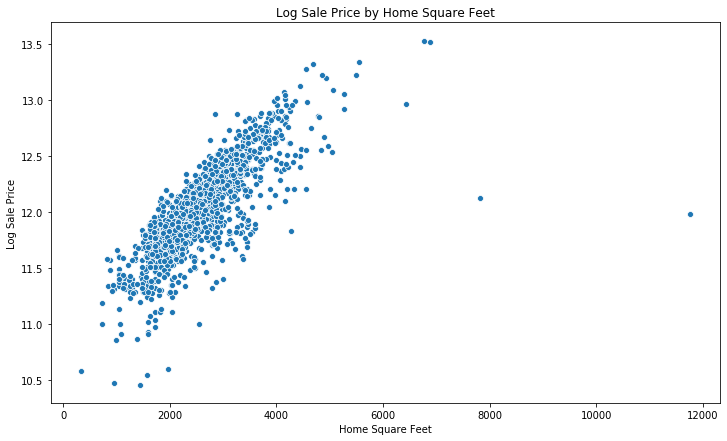

In [20]:
scatterplot_(train, 'bldg_sqft', 'sale_log', 1)
plt.xlabel('Home Square Feet')
plt.ylabel('Log Sale Price')
plt.title('Log Sale Price by Home Square Feet')

**Square Feet versus Number of Rooms**

A common issue with linear-based models is multicollinearity. Two initial areas that showed both a strong correleation individually with SalePrice but also between predictors were square feet and number of non-basement rooms (note - number of basement rooms was not separately captured within the data).

To evaluate which of these two feature - square footage or number of rooms - would be more correlated to the log-transformed sales price, we evaluated the below correlation heatmap.

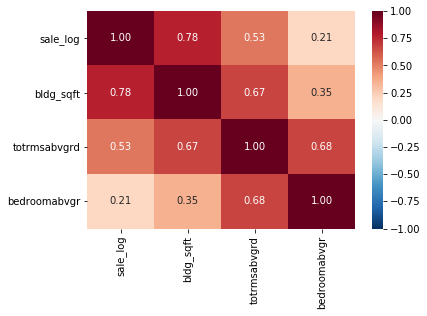

In [8]:
from seaborn import heatmap

df = train[['sale_log', 'bldg_sqft', 'totrmsabvgrd', 'bedroomabvgr']]

heatmap(
    df.corr(),
    fmt=".2f",
    annot=True,
    cmap="RdBu_r",
    vmin=-1,
    vmax=1,
)

- This correlation heatmap shows us that although both total building sqft and total non-basement rooms have strong coorelation with the natural log of sales price - .78 and .53, respectively - the two are also highly correlated with each other (.67).

- We elected to utilize bldg_sqft instead of total non-basement rooms due to its stronger individual correlation with the log-transformed sales price. Total non-basement rooms was dropped due to be less strongly correlated with log-transformed sales price and its high correlation to building sqft. 

To get a more accurate display of usable lot space we also combined porches and decks into a single variable as outside square feet. Additionally, we subracted the first floor square feet and the outside square feet to give us a better estimate of usable lot space.

To get a more accurate display of usable lot space we also combined porches and decks into a single variable as outside square feet. Additionally, we subracted the first floor square feet and the outside square feet to give us a better estimate of usable lot space.

In [21]:
train['outside_sf'] = train[["wooddecksf", "openporchsf", "3ssnporch", "screenporch", "enclosedporch"]].sum(axis="columns")

train['adj_lot_area'] = train["lotarea"] - train['outside_sf'] - train["1stflrsf"]

Outside square feet encompases decks, open porches, enclosed porches, three season porches, and screened porches. There appears there may be a slight trend in outside square feet as log sale price increases. We can also see there are several homes that do not have any outside square feet.

Text(0.5, 1.0, 'Log Sale Price by Outside Square Feet')

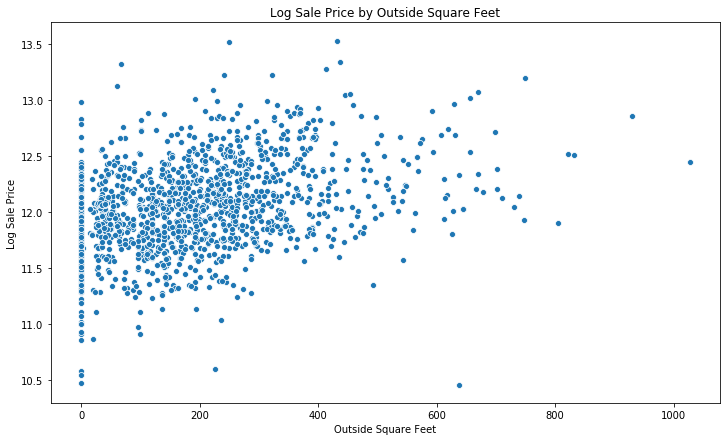

In [22]:
scatterplot_(train, 'outside_sf', 'sale_log', 2)
plt.xlabel('Outside Square Feet')
plt.ylabel('Log Sale Price')
plt.title('Log Sale Price by Outside Square Feet')

Similarly, there appears to be a linear trend with regards to adjusted lot square feet but outliers may have a high leverage on any trend. 

Text(0.5, 1.0, 'Log Sale Price by Adjusted Lot Square Feet')

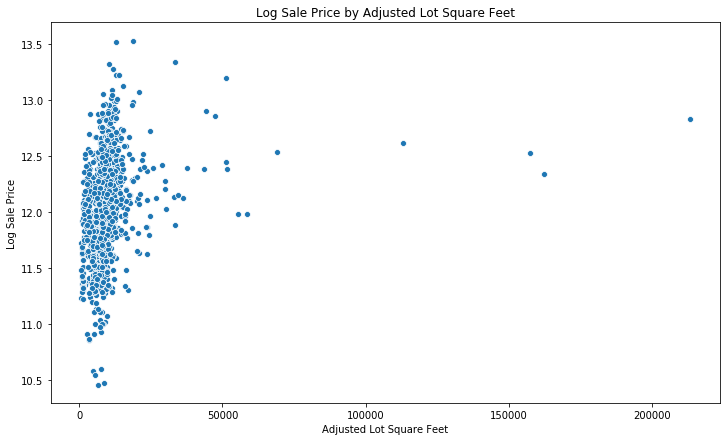

In [23]:
scatterplot_(train, 'adj_lot_area', 'sale_log', 3)
plt.xlabel('Adjusted Lot Square Feet')
plt.ylabel('Log Sale Price')
plt.title('Log Sale Price by Adjusted Lot Square Feet')

Value Counts: 

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: salecondition, dtype: int64
--------------------------------------------------


Text(0.5, 1.0, 'Log Sale Price by Sale Condition')

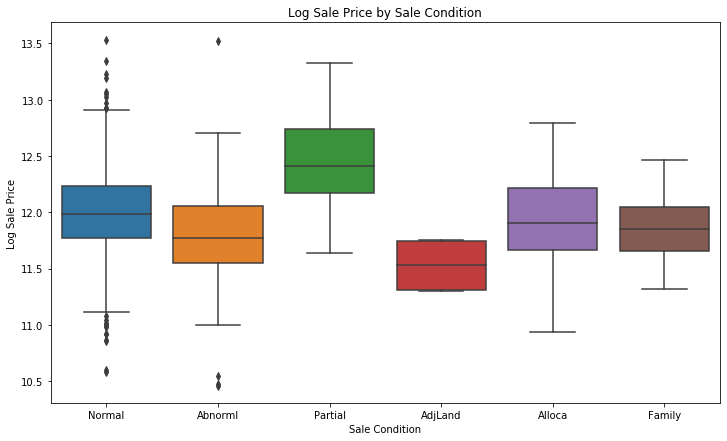

In [24]:
boxplot_(train, 'salecondition', 'sale_log', 4)
plt.xlabel('Sale Condition')
plt.ylabel('Log Sale Price')
plt.title('Log Sale Price by Sale Condition')

**Neighborhood**

Below, we can see varation in log price amond different neighborhoods. The top 3 neighborhoods based upon median home price sales appear to be "NridgHt", "NoRidge", and "StoneBr."

Value Counts: 

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: neighborhood, dtype: int64
--------------------------------------------------


Text(0.5, 1.0, 'Log Sale Price by Neighborhood')

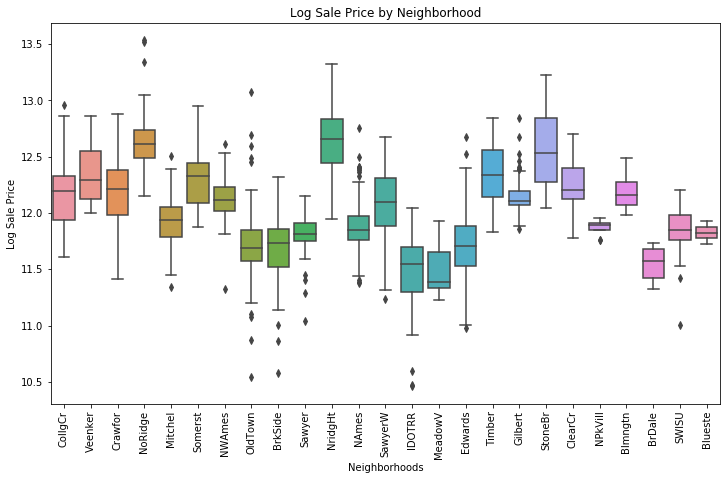

In [25]:
boxplot_(train, 'neighborhood', 'sale_log', 5)

plt.xlabel('Neighborhoods')
plt.ylabel('Log Sale Price')
plt.xticks(rotation = 90)
plt.title('Log Sale Price by Neighborhood')

**Home Style, Garage, and Rooms**

We can see that most homes are a single family home. Additionally, there does appear to be a trend in higher median log sale prices in homes that have a garage. Below, the size of the garage was measured in car capacity or the number of cars that could fit in the garage. There appears to be a drop in log sale prices after a garage can hold more than 3 cars, however, the price is still above no garage. 

Value Counts: 

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: bldgtype, dtype: int64
--------------------------------------------------


Text(0.5, 1.0, 'Log Sale Price by Home Type')

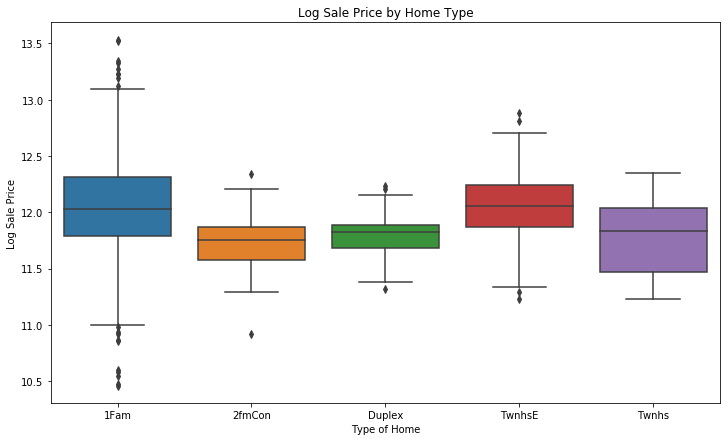

In [26]:
boxplot_(train, 'bldgtype', 'sale_log', 6)

plt.xlabel('Type of Home')
plt.ylabel('Log Sale Price')
plt.title('Log Sale Price by Home Type')

Value Counts: 

2    824
1    369
3    181
0     81
4      5
Name: garagecars, dtype: int64
--------------------------------------------------


Text(0.5, 1.0, 'Log Sale Price by Garage Size')

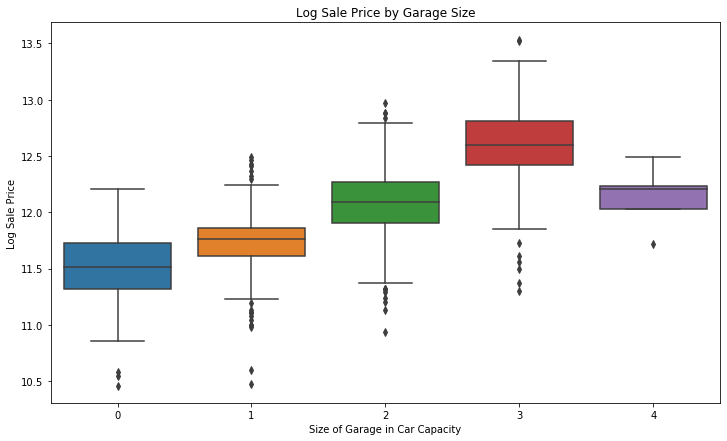

In [27]:
boxplot_(train, 'garagecars', 'sale_log', 7)

plt.xlabel('Size of Garage in Car Capacity')
plt.ylabel('Log Sale Price')
plt.title('Log Sale Price by Garage Size')

Note that the number of bedrooms above grade does not include any bedrooms in the basement. While there is some variation in log sale price among the number of bedrooms there appears to be less variation in sale price in homes with two or three bedrooms. This could be because they have the most frequent sales. 

Value Counts: 

3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: bedroomabvgr, dtype: int64
--------------------------------------------------


Text(0.5, 1.0, 'Log Sale Price by Number of Bedrooms')

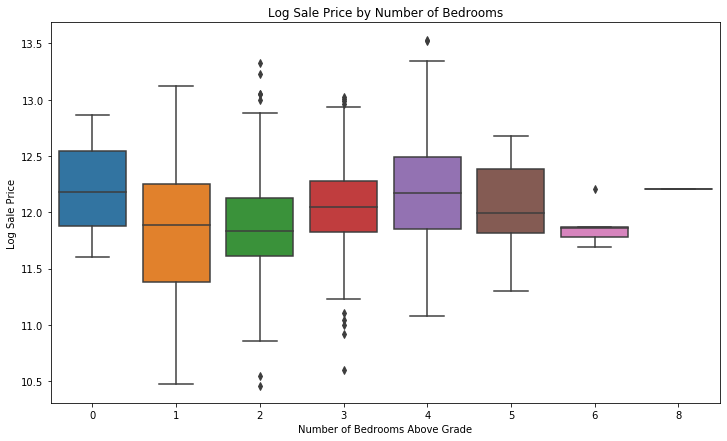

In [28]:
boxplot_(train, 'bedroomabvgr', 'sale_log', 8)

plt.xlabel('Number of Bedrooms Above Grade')
plt.ylabel('Log Sale Price')
plt.title('Log Sale Price by Number of Bedrooms')

The number of bathrooms was another category that was divided. Below we combined the number of full and half baths throughout the home. Overall, it appears that the number of bathrooms a home has may have an impact on log median sale price. However, after 4 bathrooms the median sale price drops. Furthermore, there are very few homes that have 4 or more bathrooms. 

In [29]:
train['total_baths'] = train["fullbath"]  + train["halfbath"]/ 2 + train["bsmtfullbath"] \
                   + train["bsmthalfbath"] / 2

Value Counts: 

2.0    456
2.5    295
1.0    228
3.0    186
3.5    144
1.5    129
4.0     13
4.5      7
5.0      1
6.0      1
Name: total_baths, dtype: int64
--------------------------------------------------


Text(0.5, 1.0, 'Log Sale Price by Number of Bathrooms')

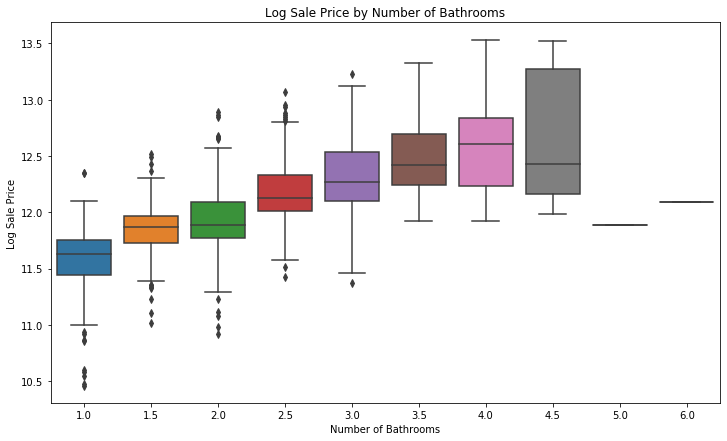

In [30]:
boxplot_(train, 'total_baths', 'sale_log', 9)

plt.xlabel('Number of Bathrooms')
plt.ylabel('Log Sale Price')
plt.title('Log Sale Price by Number of Bathrooms')

**Home Quality and Features** 

There is a clear pattern between overall home quality and and the log sale price. As the home quality rating increase median log sale price appears to increase also. 

Value Counts: 

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: overallqual, dtype: int64
--------------------------------------------------


Text(0.5, 1.0, 'Log Sale Price by Overall Home Quality')

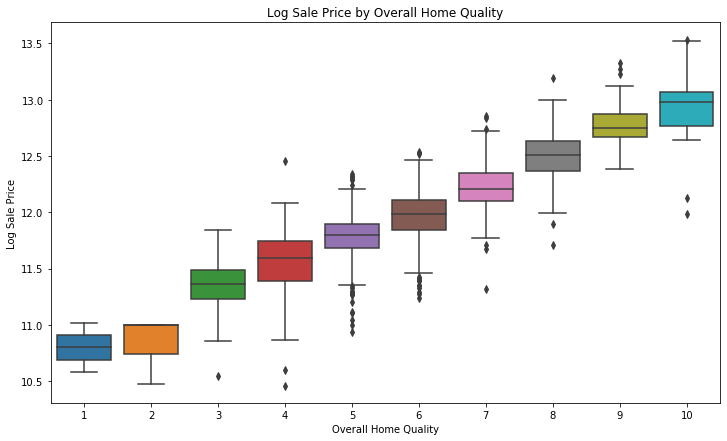

In [31]:
boxplot_(train, 'overallqual', 'sale_log', 10)

plt.xlabel('Overall Home Quality')
plt.ylabel('Log Sale Price')
plt.title('Log Sale Price by Overall Home Quality')

Below are quaility ratings for fireplaces, kitchens, and the basement finish area. It appears homes with none or fair ratings typically have lower median log sale prices than homes with better rated features. 

Value Counts: 

None    690
Gd      380
TA      313
Fa       33
Ex       24
Po       20
Name: fireplacequ, dtype: int64
--------------------------------------------------


Text(0.5, 1.0, 'Log Sale Price by Fireplace Quality')

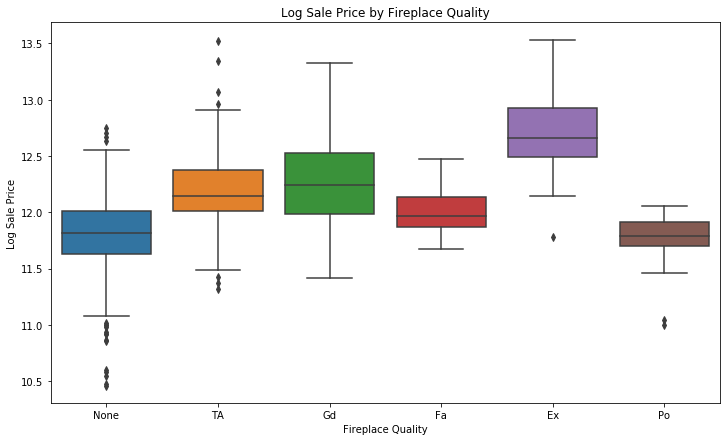

In [32]:
boxplot_(train, 'fireplacequ', 'sale_log', 11)

plt.xlabel('Fireplace Quality')
plt.ylabel('Log Sale Price')
plt.title('Log Sale Price by Fireplace Quality')

Value Counts: 

TA    735
Gd    586
Ex    100
Fa     39
Name: kitchenqual, dtype: int64
--------------------------------------------------


Text(0.5, 1.0, 'Log Sale Price by Kitchen Quality')

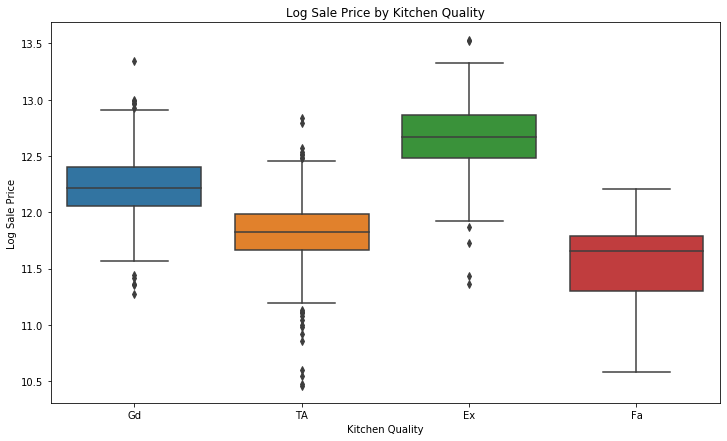

In [33]:
boxplot_(train, 'kitchenqual', 'sale_log', 12)

plt.xlabel('Kitchen Quality')
plt.ylabel('Log Sale Price')
plt.title('Log Sale Price by Kitchen Quality')

Value Counts: 

Unf     430
GLQ     418
ALQ     220
BLQ     148
Rec     133
LwQ      74
None     37
Name: bsmtfintype1, dtype: int64
--------------------------------------------------


Text(0.5, 1.0, 'Log Sale Price by Rating of Finished Basement Area')

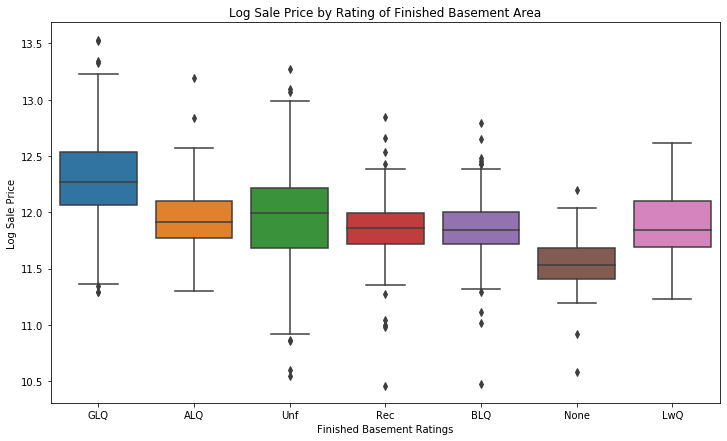

In [34]:
boxplot_(train, 'bsmtfintype1', 'sale_log', 13)

plt.xlabel('Finished Basement Ratings')
plt.ylabel('Log Sale Price')
plt.title('Log Sale Price by Rating of Finished Basement Area')

Value Counts: 

TA      649
Gd      618
Ex      121
None     37
Fa       35
Name: bsmtqual, dtype: int64
--------------------------------------------------


Text(0.5, 1.0, 'Log Sale Price by Rating of Basement Height')

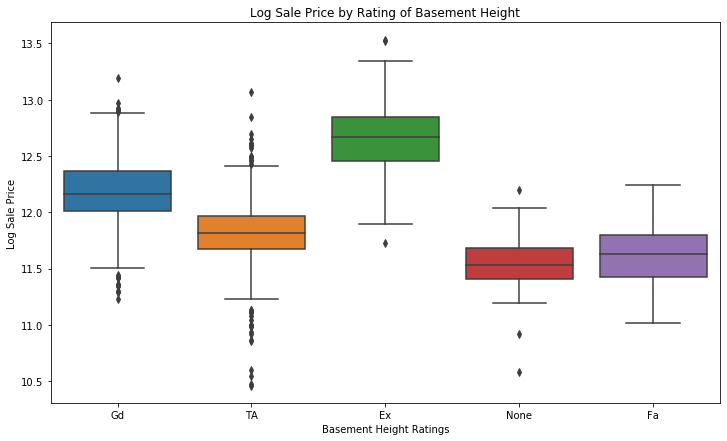

In [35]:
boxplot_(train, 'bsmtqual', 'sale_log', 14)

plt.xlabel('Basement Height Ratings')
plt.ylabel('Log Sale Price')
plt.title('Log Sale Price by Rating of Basement Height')

**Electrical, Heating, and Cooling**

Most homes utilize a standard circuit breaker system for their electricity. Homes with better heating and those with central air conditioning typically have higher median log sale prices.

Value Counts: 

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: electrical, dtype: int64
--------------------------------------------------


Text(0.5, 1.0, 'Log Sale Price by Electrical System')

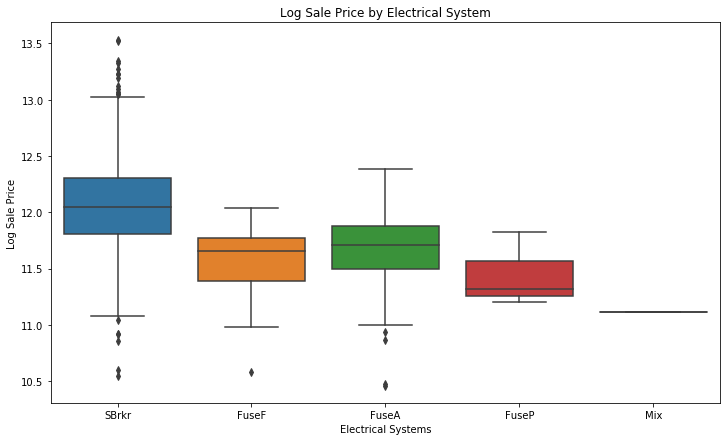

In [36]:
boxplot_(train, 'electrical', 'sale_log', 15)

plt.xlabel('Electrical Systems')
plt.ylabel('Log Sale Price')
plt.title('Log Sale Price by Electrical System')

Value Counts: 

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: heatingqc, dtype: int64
--------------------------------------------------


Text(0.5, 1.0, 'Log Sale Price by Heating Quality')

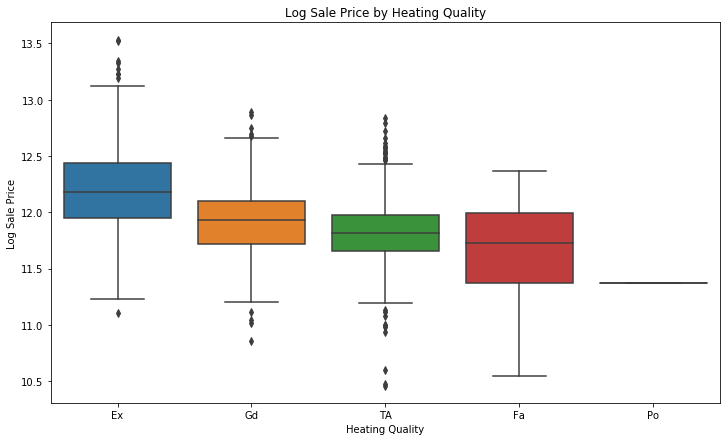

In [37]:
boxplot_(train, 'heatingqc', 'sale_log', 16)

plt.xlabel('Heating Quality')
plt.ylabel('Log Sale Price')
plt.title('Log Sale Price by Heating Quality')

Value Counts: 

Y    1365
N      95
Name: centralair, dtype: int64
--------------------------------------------------


Text(0.5, 1.0, 'Log Sale Price by Central Air')

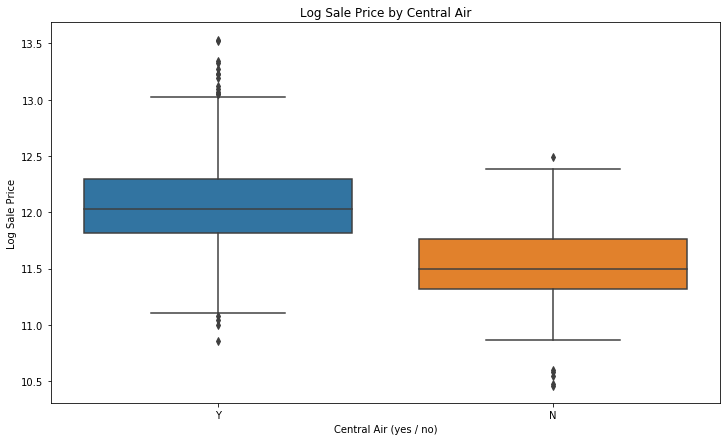

In [38]:
boxplot_(train, 'centralair', 'sale_log', 17)

plt.xlabel('Central Air (yes / no)')
plt.ylabel('Log Sale Price')
plt.title('Log Sale Price by Central Air')